# Plot kinematic distributions of SIDIS skimming from a subset of BAND runs

last edit Sep-9, 2021 (EOC, mbp)

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [2]:
main_data_path = '/Users/erezcohen/Desktop/data/BAND/AnalysisFiles/AnalysisCSVfiles/skimmed_SIDIS/'

# 1. load data

In [3]:
eepims_data,eepips_data = dict(),dict()
e_pips,e_pims = pd.DataFrame(),pd.DataFrame()
runs = [6420,6421]
for run in runs:
    eepips_data[run] = pd.read_csv(main_data_path 
                     + "skimmed_SIDIS_inc_00%d_e_piplus_selected_eepi_kinematics"%run
                     + ".csv")
    
    e_pips = pd.concat([e_pips,eepips_data[run]])
    
    eepims_data[run] = pd.read_csv(main_data_path 
                     + "skimmed_SIDIS_inc_00%d_e_piminus_selected_eepi_kinematics"%run
                     + ".csv")

    e_pims = pd.concat([e_pims,eepims_data[run]])

    print('loaded',len(eepims_data[run]),"(e,e'pi-)",'and',len(eepips_data[run]),"(e,e'pi+)",'pairs from run',run)

loaded 187621 (e,e'pi-) and 457235 (e,e'pi+) pairs from run 6420
loaded 186637 (e,e'pi-) and 448079 (e,e'pi+) pairs from run 6421


In [4]:
print('in total, we have',len(e_pims),"(e,e'pi-)",'and',len(e_pips),"(e,e'pi+)",'pairs')
e_pims[0:4]

in total, we have 374258 (e,e'pi-) and 905314 (e,e'pi+) pairs


,status,runnum,evnum,beam_helicity,e_P,e_Theta,e_Phi,e_Vz,pi_P,pi_Theta,...,M_X,Npips,Npims,Nelectrons,Ngammas,Nprotons,Nneutrons,Ndeuterons,Unnamed: 27,Unnamed: 20
0,1,6420,993.0,-1,6.33416,0.175525,1.181650,-3.39518,1.42200,0.355468,...,3.26060,0.0,1.0,1.0,2.0,1.0,2.0,0.0,NaN,NaN
1,1,6420,1655.0,-1,4.99247,0.206060,-1.995970,-2.84176,2.19963,0.415067,...,3.59015,0.0,1.0,2.0,2.0,1.0,10.0,0.0,NaN,NaN
2,1,6420,3793.0,1,3.44465,0.339522,2.103520,-5.42179,3.00930,0.212050,...,3.79835,1.0,1.0,1.0,3.0,1.0,2.0,0.0,NaN,NaN
3,1,6420,4165.0,1,4.32325,0.272566,0.204435,-4.86434,2.56385,0.572173,...,3.42142,0.0,1.0,1.0,8.0,1.0,4.0,0.0,NaN,NaN


# 2. Load cut values

In [6]:
cutValues = pd.read_csv('/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/cutValues.csv')
display(np.array(cutValues['parameter']))

array(['Vz_e_min_inbending', 'Vz_e_max_inbending', 'Vz_e_min_outbending',
       'Vz_e_max_outbending', 'e_PCAL_W_min', 'e_PCAL_V_min',
       'e_E_PCAL_min', 'SamplingFraction_min', 'PCAL_ECIN_SF_min',
       '(Ve-Vpi)_z_max', 'y_max', 'Q2_min', 'W_min', 'Zpi_min', 'Zpi_max',
       'e_theta_min', 'e_theta_max', 'pi_theta_min', 'pi_theta_max',
       'Ppi_min', 'Ppi_max'], dtype=object)

In [7]:
def cutValue(cutName='W_min'):
    return (np.array(cutValues[cutValues['parameter']==cutName]['value'])[0])

# 3. Plot distributions

## 3.1 $W$ and $z$

In [8]:
Wmin = cutValue(cutName='W_min')
Zmin = cutValue(cutName='Zpi_min')
Zmax = cutValue(cutName='Zpi_max')

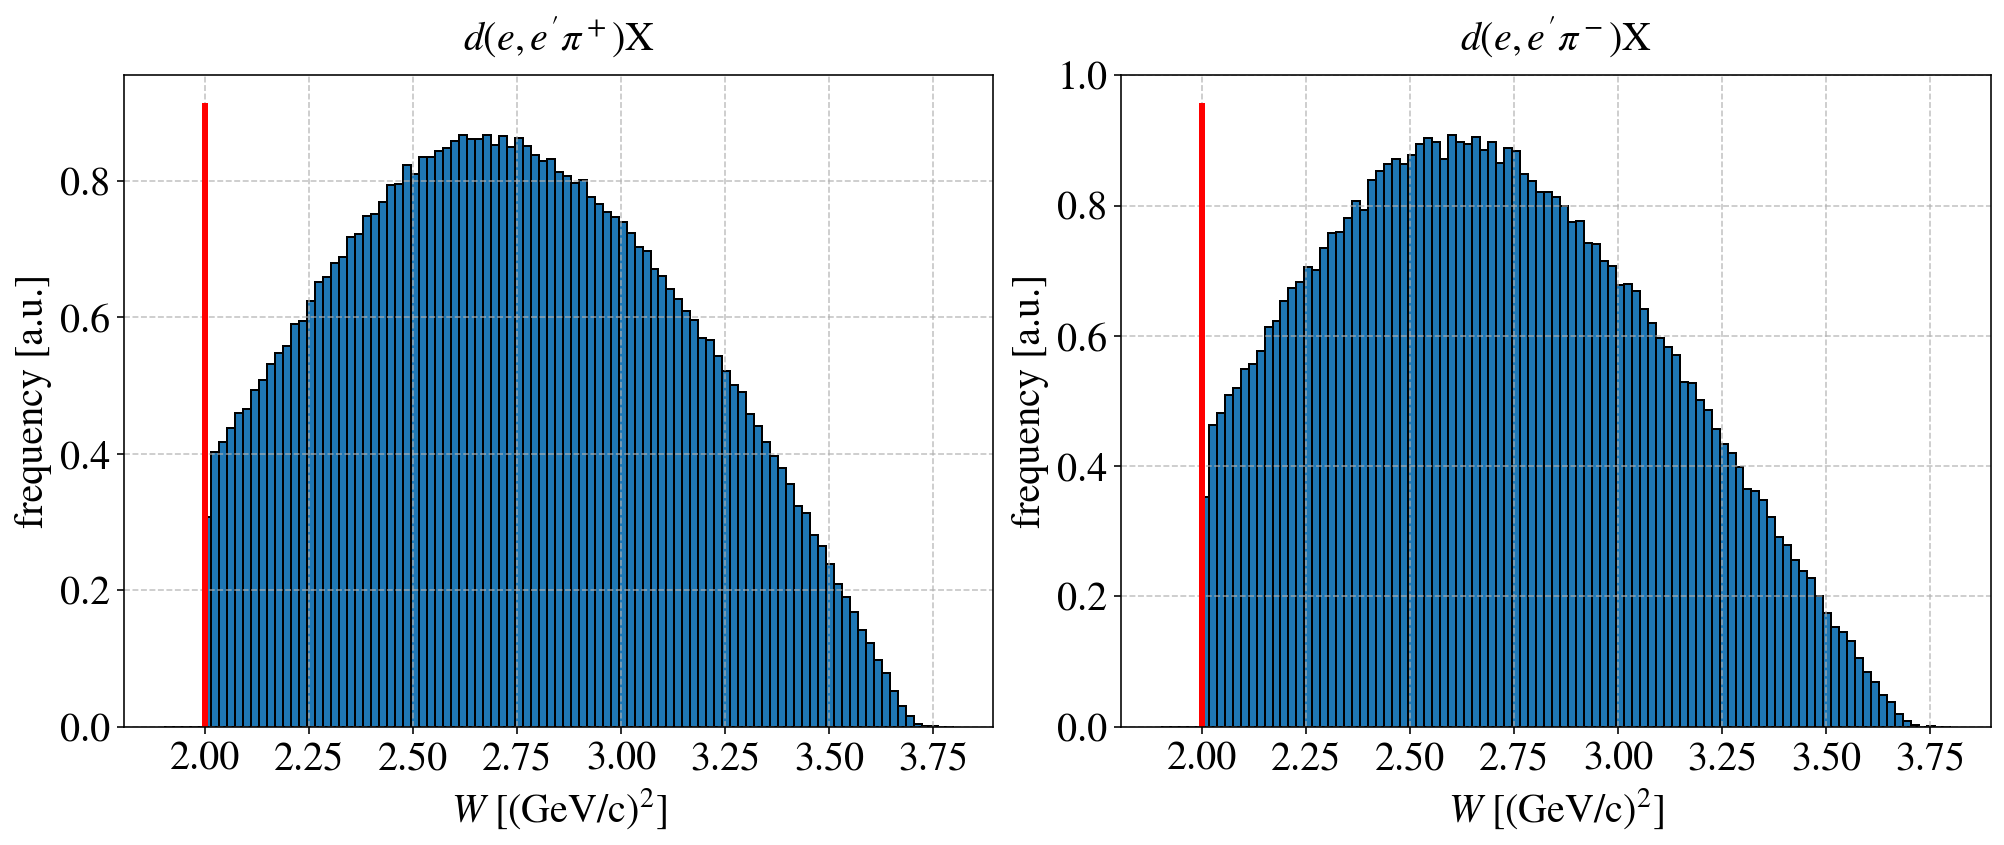

In [9]:
bins = np.linspace(1.9,3.8,100)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],                                  
                                  ["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],
                                  [1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['W'] , bins=bins, edgecolor='k', density=True)
    set_axes(ax,'$W$ [(GeV/c)$^2$]','frequency [a.u.]',
             title = df_label,fontsize=20,do_add_grid=True);
    plt.plot( [Wmin,Wmin],ax.get_ylim(), '-r', linewidth=3)
plt.tight_layout()

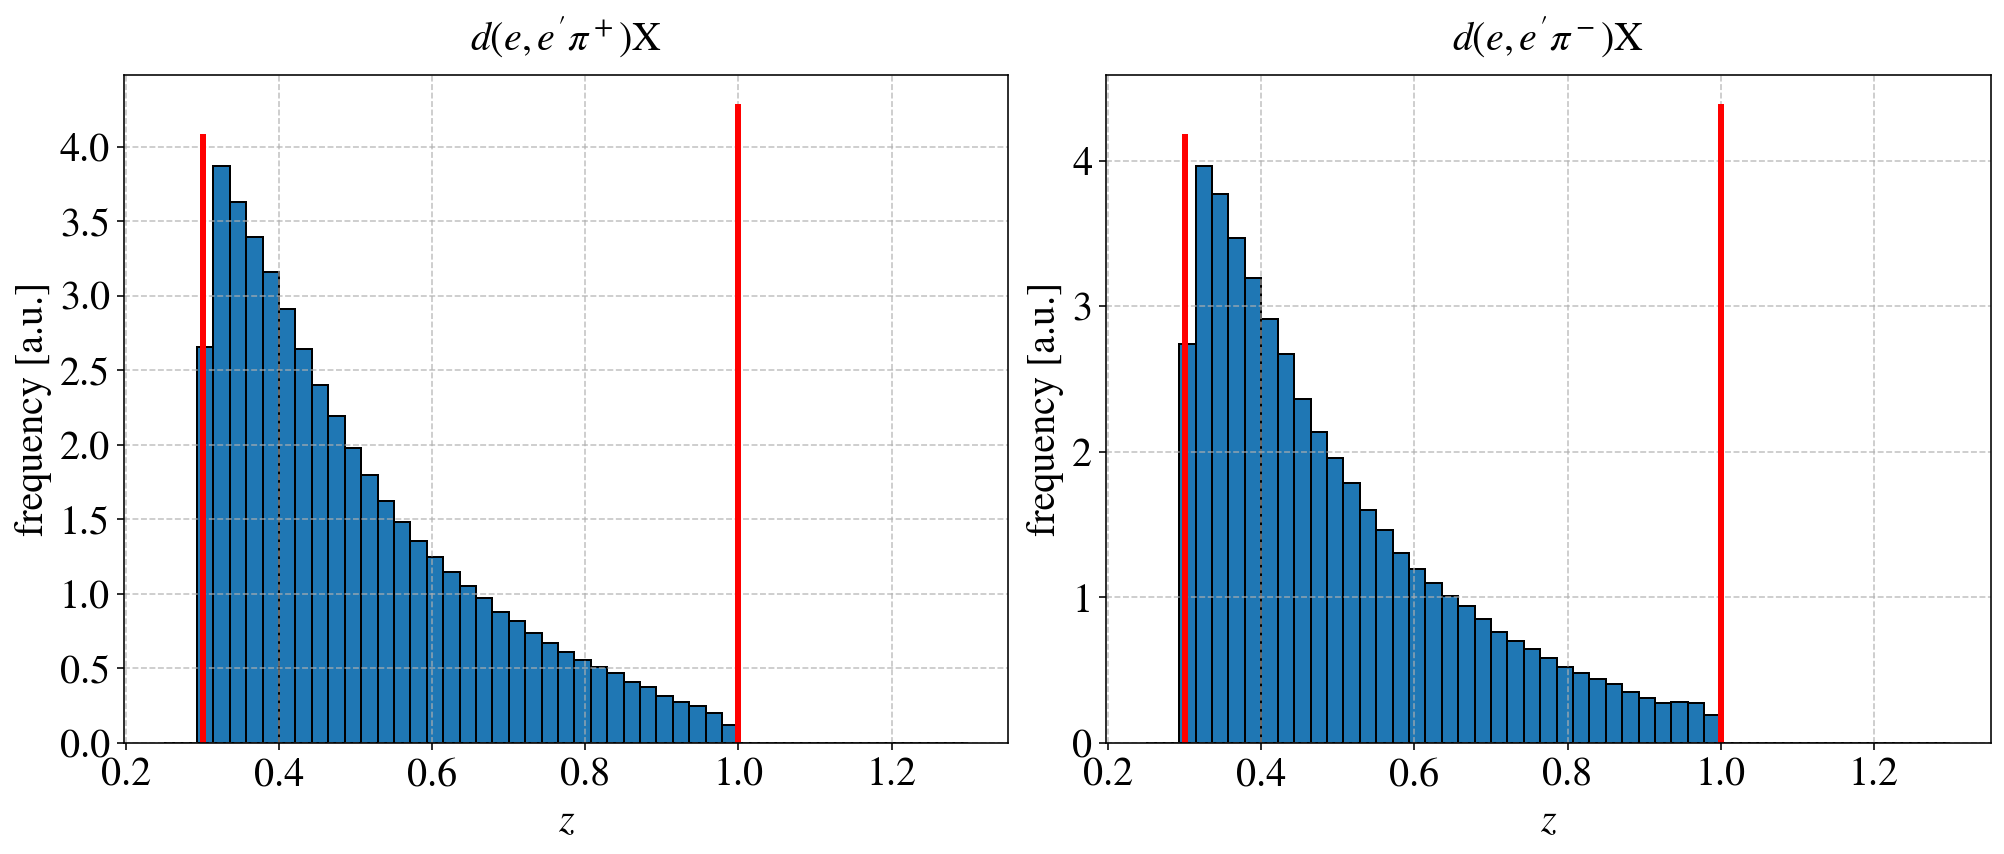

In [10]:
bins = np.linspace(0.25,1.3,50)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],                                  
                                  ["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],
                                  [1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['Zpi'] , bins=bins, edgecolor='k', density=True)
    set_axes(ax,'$z$','frequency [a.u.]',
             title = df_label,fontsize=20,do_add_grid=True);
    plt.plot( [Zmin,Zmin],ax.get_ylim(), '-r', linewidth=3)
    plt.plot( [Zmax,Zmax],ax.get_ylim(), '-r', linewidth=3)    
plt.tight_layout()

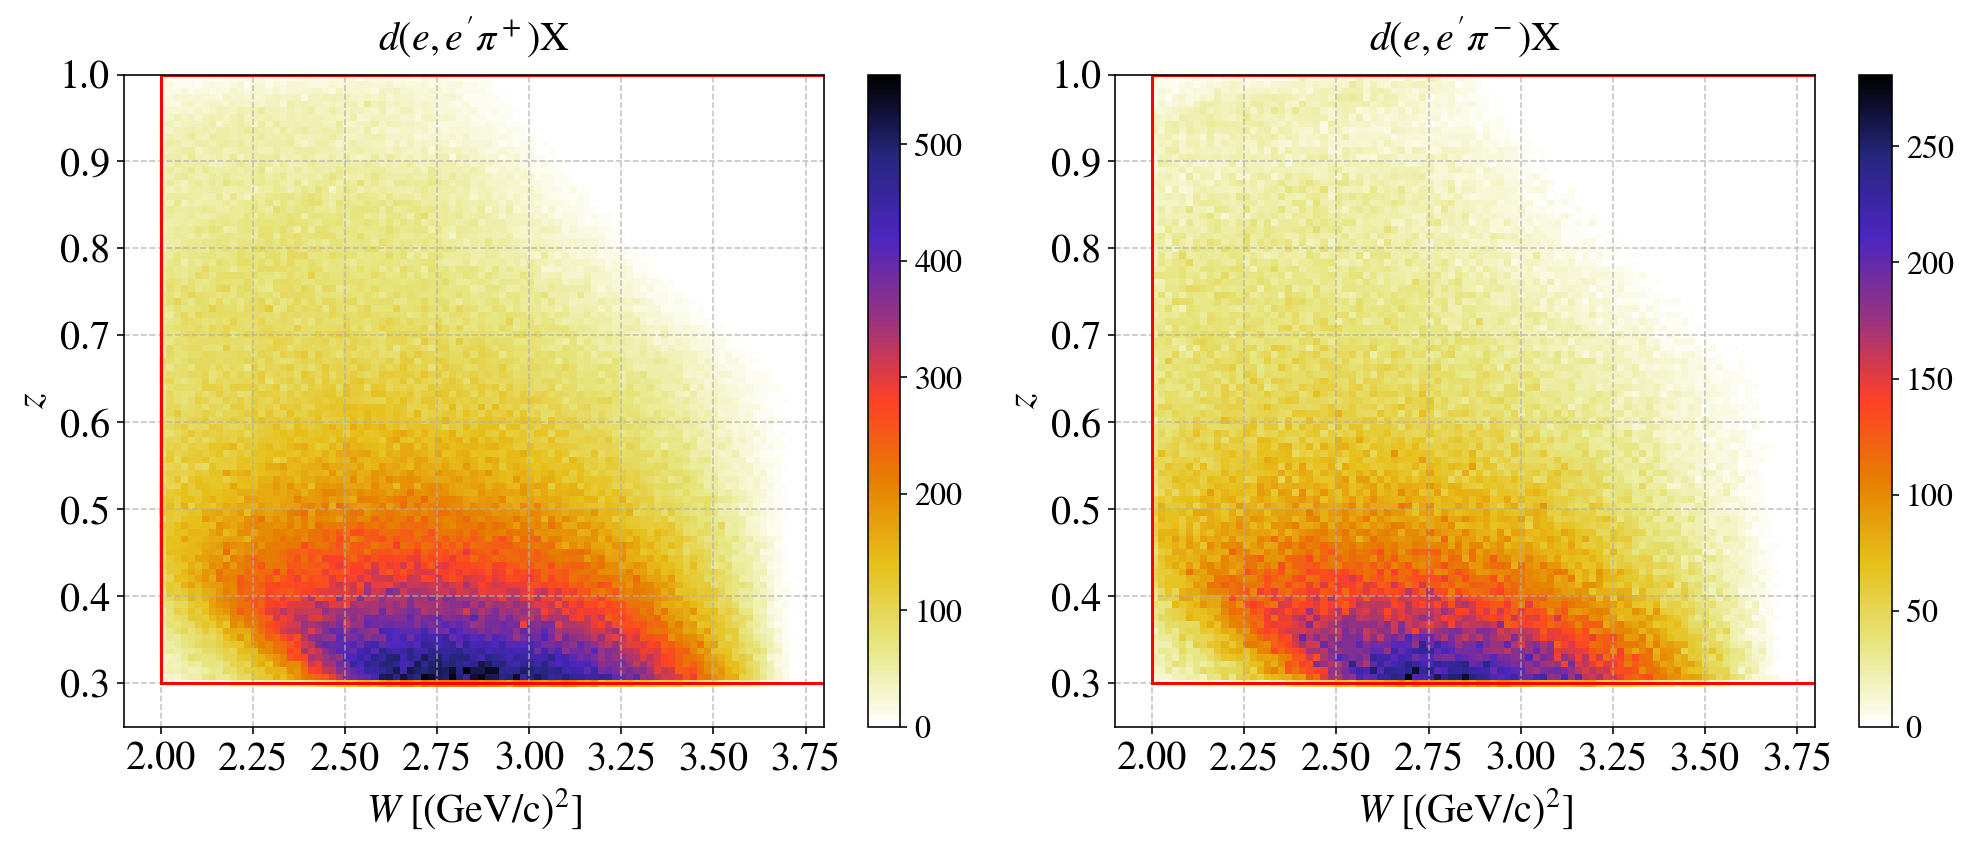

In [10]:
Nbins = 100

bins = (np.linspace(1.9,3.8,Nbins),np.linspace(0.25,1.,Nbins))
xlim = [1.8,4]
ylim = [0.25,1]

fig = plt.figure(figsize=(14,6))

for df,df_label,subplotIdx in zip([e_pips,e_pims],                                  
                                  ["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],
                                  [1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist2d( df['W'], df['Zpi'] , bins=bins, cmap='CMRmap_r' )
    cbar=fig.colorbar(h[3],ax=ax); cbar.ax.tick_params(labelsize=16)
    set_axes(ax,'$W$ [(GeV/c)$^2$]','$z$',ylim=ylim,
             title =  df_label,fontsize=20,do_add_grid=True);

    plt.plot( [Wmin,Wmin],[Zmin,np.max(ylim)], '-r')
    plt.plot( [Wmin,np.max(xlim)],[Zmin,Zmin], '-r')
    plt.plot( [Wmin,np.max(xlim)],[Zmax,Zmax], '-r')

    
plt.tight_layout()

### 3.1.1 - our $z$ distribution falls much softer then expected
We need to investigate it.
What are the events with high $z$?

Here we plot only $(e,e'\pi+)$ for simplicity

In [16]:
df = e_pips;
df['Ntotal'] = df['Npips']+df['Npims']+df['Nelectrons']+df['Nprotons']+df['Nneutrons']+df['Ngammas']+df['Ndeuterons']
df['Nhadrons'] = df['Npips']+df['Npims']+df['Nprotons']+df['Nneutrons']+df['Ndeuterons']
df_highZ = df[df['Zpi']>0.9]
df_highZ

,status,runnum,evnum,beam_helicity,e_P,e_Theta,e_Phi,e_Vz,pi_P,pi_Theta,...,Npips,Npims,Nelectrons,Ngammas,Nprotons,Nneutrons,Ndeuterons,Unnamed: 27,Ntotal,Nhadrons
126,1,6420,45960.0,1,7.12071,0.171804,-3.02187,-4.11278,2.90426,0.395201,...,1,0,1,3,0,2,0,NaN,7,3
134,1,6420,48691.0,1,5.82112,0.201640,1.18711,-9.34487,4.19945,0.390326,...,1,0,1,1,0,0,0,NaN,3,1
238,1,6420,88003.0,1,6.68784,0.186901,0.18597,-1.29231,3.25327,0.307845,...,1,0,1,3,0,0,0,NaN,5,1
380,1,6420,139711.0,-1,5.78242,0.177135,1.14261,1.63005,4.02322,0.234824,...,3,0,1,0,0,1,0,NaN,5,4
439,1,6420,162480.0,-1,5.49719,0.174853,1.17903,-5.18129,4.25656,0.284357,...,1,0,1,10,1,5,0,NaN,18,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447773,1,6421,139234000.0,1,6.86171,0.197278,1.25017,-1.82340,3.10131,0.392831,...,1,0,1,1,0,1,0,NaN,4,2
447887,1,6421,139270000.0,1,5.31552,0.188716,-1.04149,-5.07078,4.83207,0.252293,...,1,0,1,0,0,1,0,NaN,3,2
447906,1,6421,139275000.0,-1,5.97004,0.209660,3.08087,-4.32028,3.80768,0.278416,...,1,0,1,5,0,4,0,NaN,11,5
447960,1,6421,139296000.0,1,5.53521,0.182847,2.16647,-5.02202,4.32083,0.196760,...,1,0,1,2,0,1,0,NaN,5,2


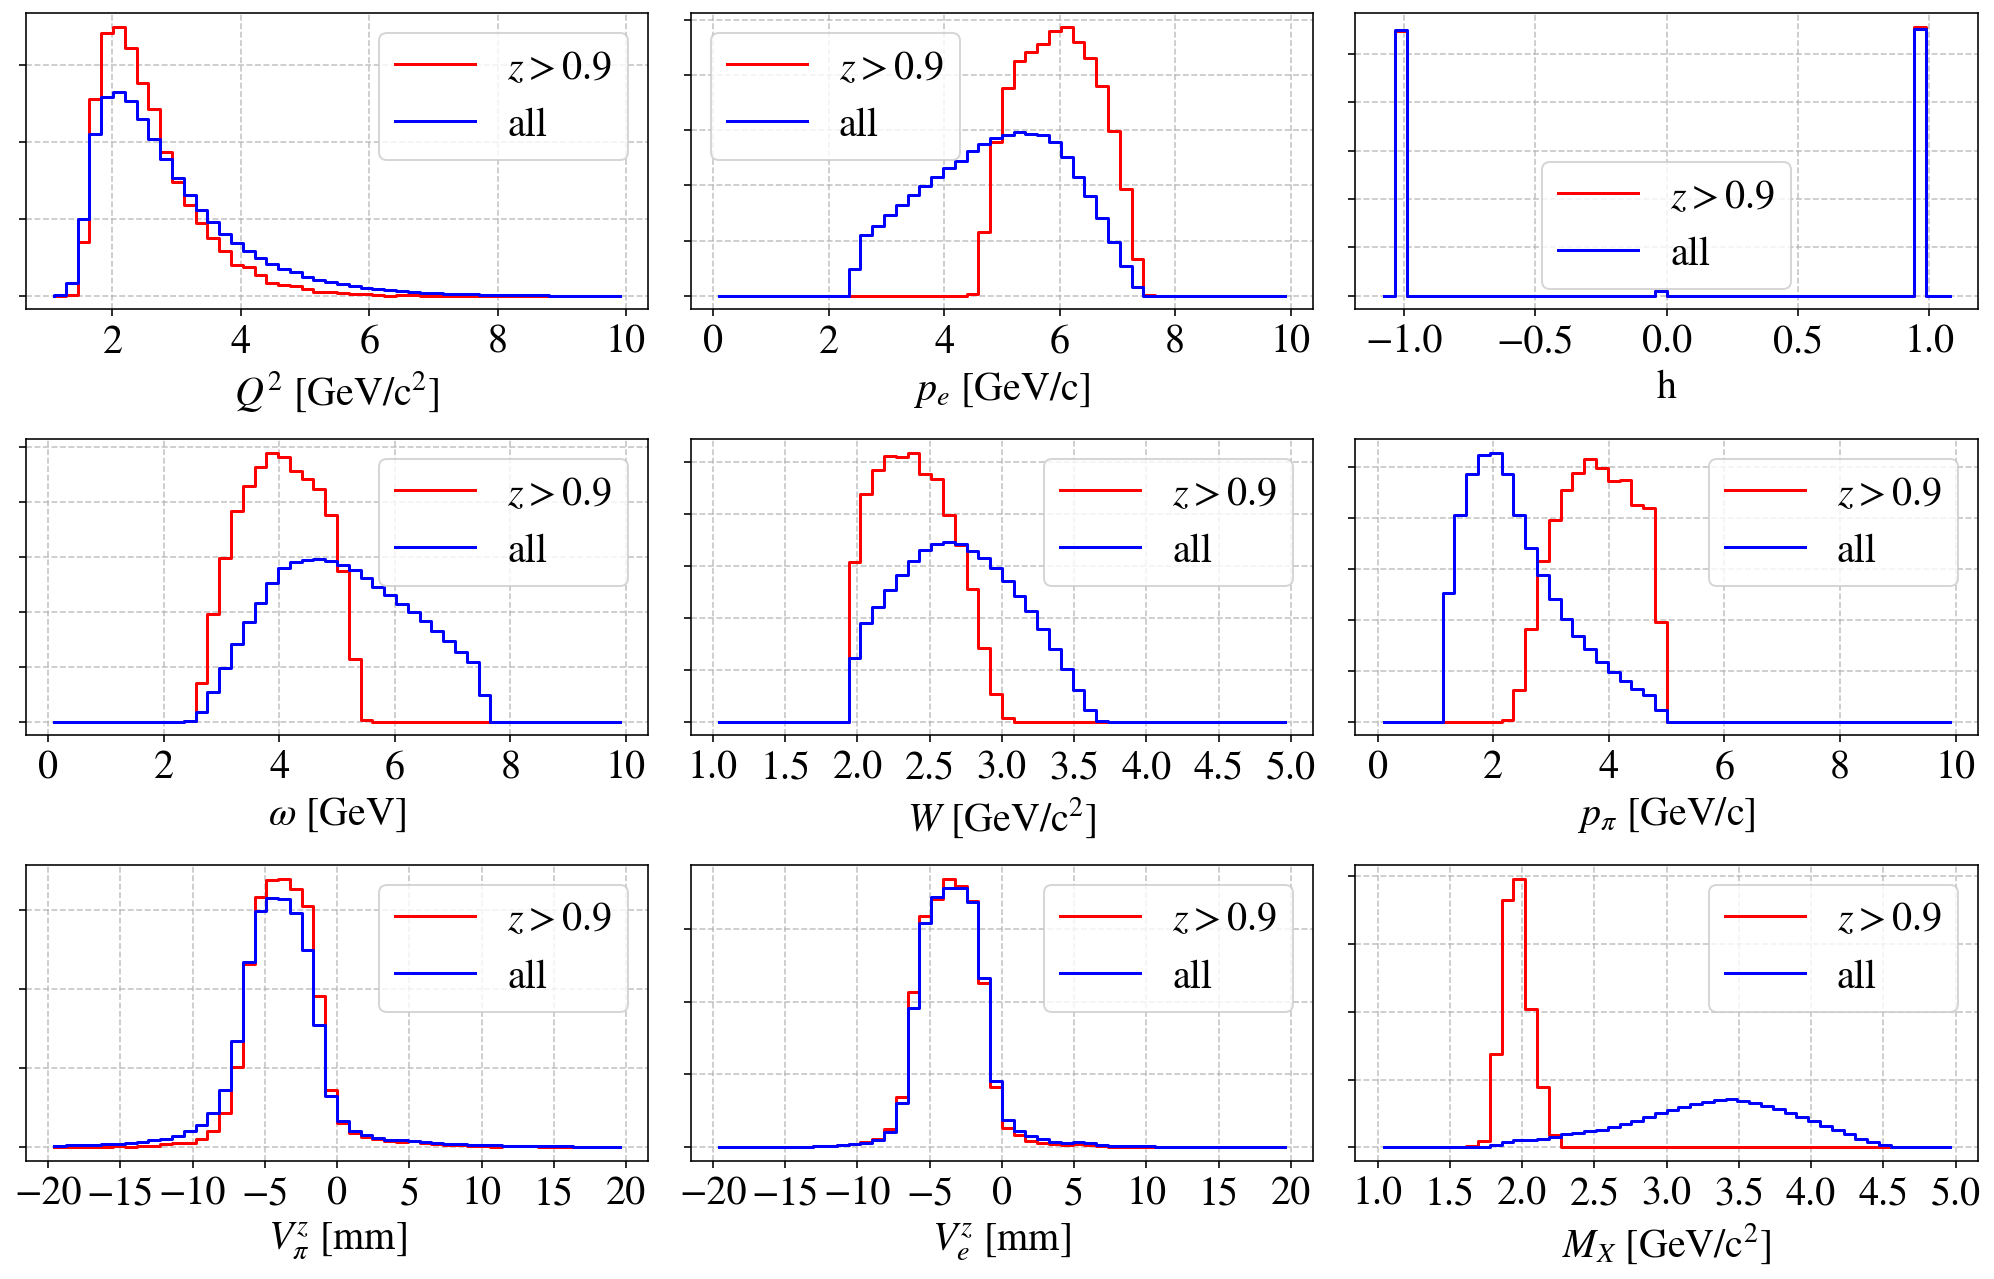

In [17]:
fig = plt.figure(figsize=(14,9))
subplotIdx = 0;
for variable,varlabel,minmax in zip(['Q2','e_P','beam_helicity','omega','W','pi_P','pi_Vz','e_Vz','M_X'],                                               
                                    ['$Q^{2}$ [GeV/c$^2$]','$p_e$ [GeV/c]','h','$\omega$ [GeV]','$W$ [GeV/c$^2$]','$p_\\pi$ [GeV/c]','$V_\\pi^z$ [mm]','$V_e^z$ [mm]','$M_X$ [GeV/c$^2$]'],                                    
                                    [[1,10],[0,10],[-1.1,1.1],[0,10],[1,5],[0,10],[-20,20],[-20,20],[1,5]],):
    subplotIdx = subplotIdx+1
    bins = np.linspace(minmax[0],minmax[1],50)
    ax = fig.add_subplot(3,3,subplotIdx)
    h_highZ,edges=np.histogram( df_highZ[variable] , bins=bins, density=True)
    h_allZ,edges=np.histogram( df[variable] , bins=bins, density=True)
    centers = (edges[1:]+edges[:-1])/2
    ax.step(centers,h_highZ,'-r',label='$z>0.9$')
    ax.step(centers,h_allZ,'-b',label='all')

    set_axes(ax,varlabel,'',fontsize=20,do_add_grid=True,remove_ticks_y=True,
            do_add_legend=True )#if subplotIdx==1 else False);
    
plt.tight_layout()

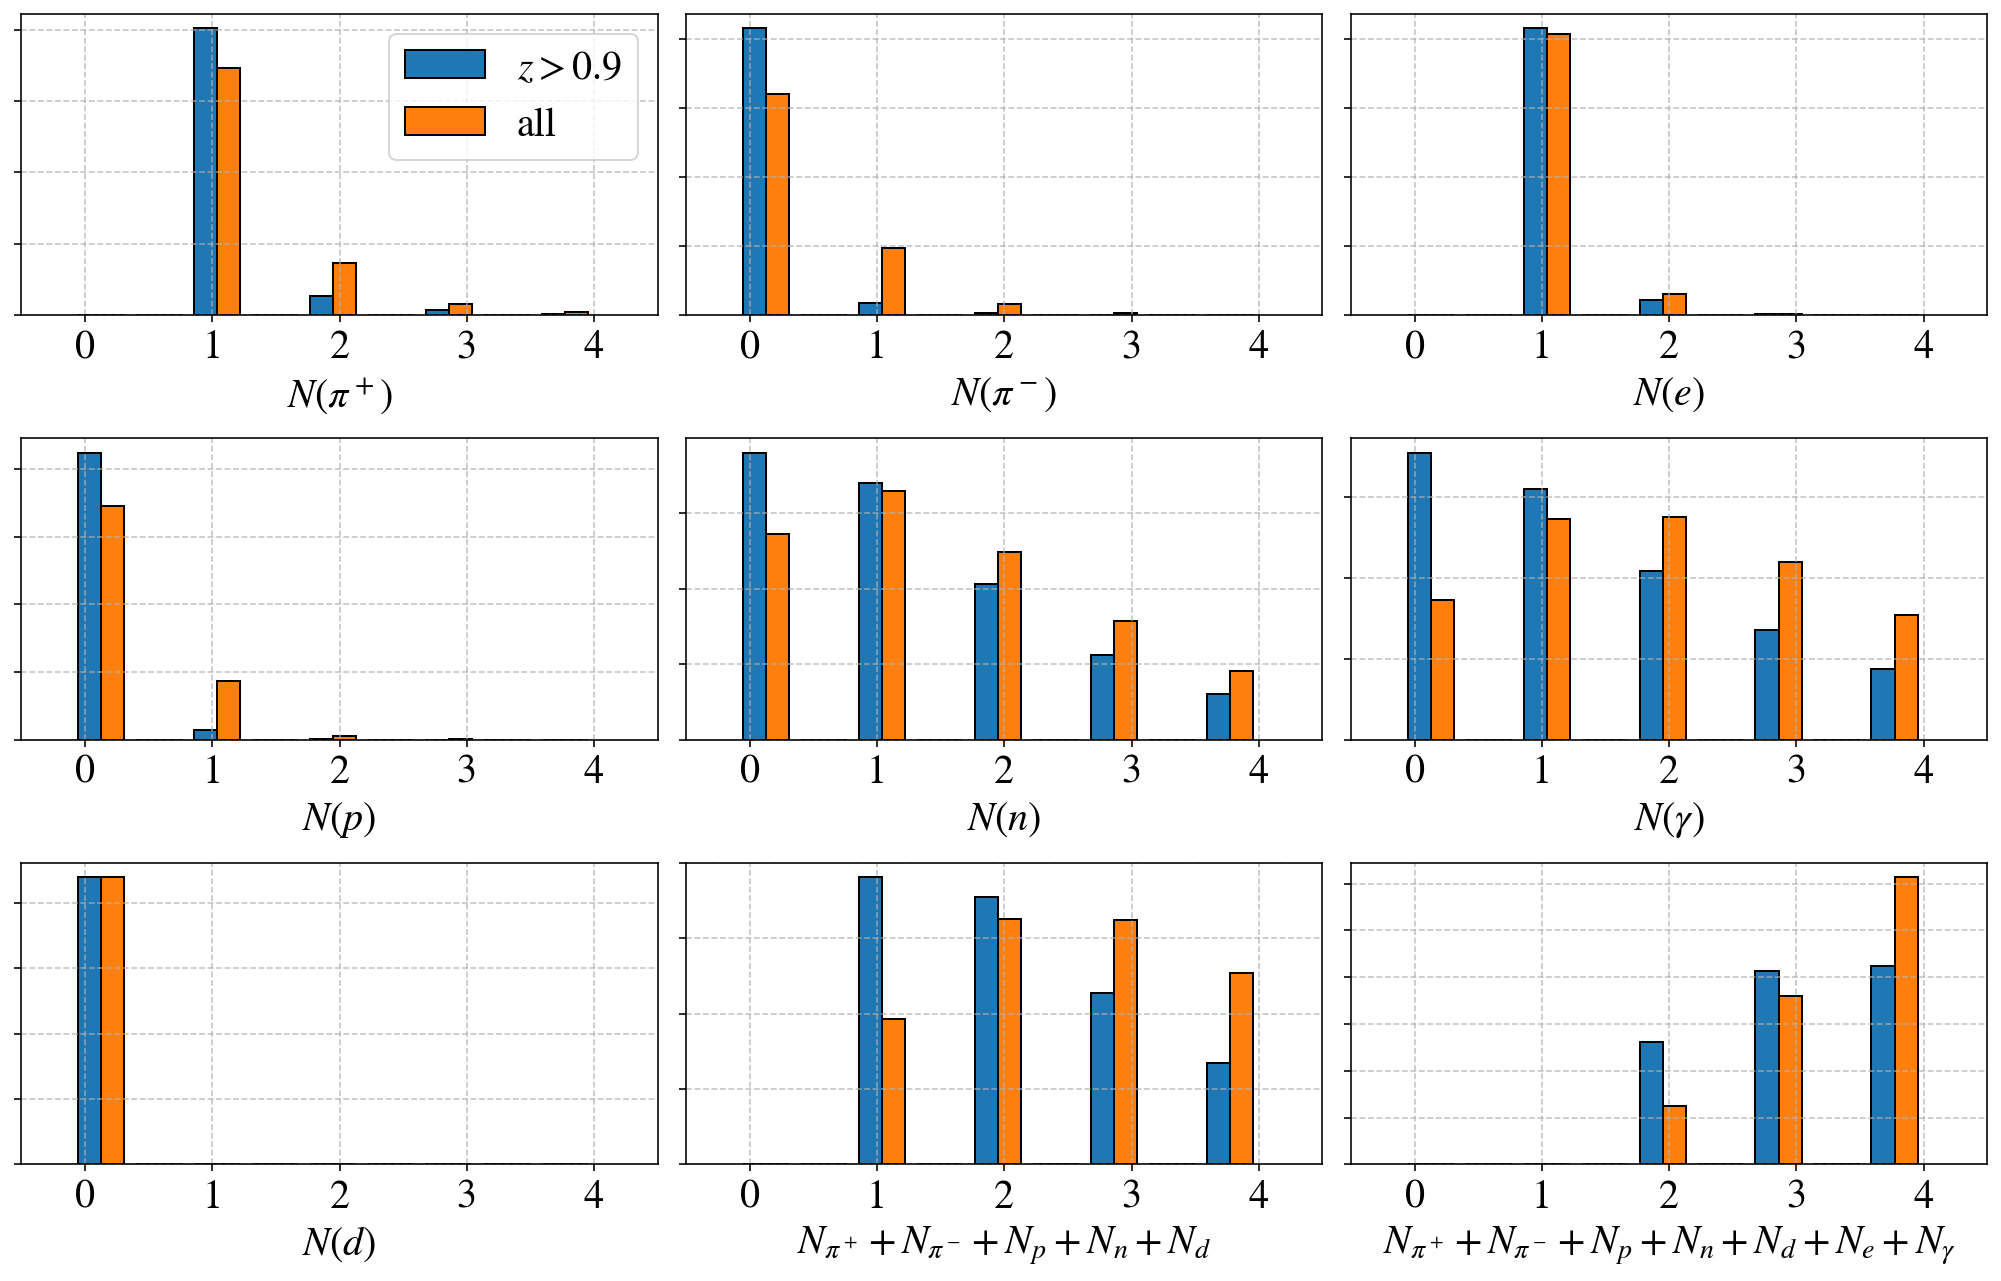

In [19]:
fig = plt.figure(figsize=(14,9))
subplotIdx = 0;
for variable,varlabel in zip(   ['Npips','Npims','Nelectrons','Nprotons','Nneutrons','Ngammas','Ndeuterons','Nhadrons','Ntotal'],
                                ['$N(\pi^+)$','$N(\pi^-)$','$N(e)$','$N(p)$','$N(n)$','$N(\gamma)$','$N(d)$',
                                 '$N_{\pi^+} + N_{\pi^-} + N_{p} + N_{n} + N_{d}$','$N_{\pi^+} + N_{\pi^-} + N_{p} + N_{n} + N_{d} + N_e + N_{\gamma}$']):
    subplotIdx = subplotIdx+1
    bins = np.linspace(-0.1,4,10)
    ax = fig.add_subplot(3,3,subplotIdx)
    x_highZ = np.array(df_highZ[variable][~np.isnan(np.array(df_highZ[variable]))])
    x_all = np.array(df[variable][~np.isnan(np.array(df[variable]))])
    plt.hist([x_highZ, x_all], bins, label=['$z>0.9$', 'all'],density=True, edgecolor='k')
    
#     h_highZ,edges=np.histogram( np.array(df_highZ[variable][~np.isnan(np.array(df_highZ[variable]))]) , bins=bins, density=True)
#     h_allZ,edges=np.histogram( np.array(df[variable][~np.isnan(np.array(df[variable]))]) , bins=bins, density=True)
#     centers = (edges[1:]+edges[:-1])/2
#     ax.step(centers,h_highZ,'-r',label='$z>0.9$', where='mid')
#     ax.step(centers+0.1,h_allZ,'-b',label='all', where='mid')
    set_axes(ax,varlabel,'',fontsize=20,do_add_grid=True,remove_ticks_y=True,xlim=(-0.5,4.5),xticks=(0,1,2,3,4),
            do_add_legend=True if subplotIdx==1 else False);
    
plt.tight_layout()

## 3.2 $Q^2$

In [ ]:
bins = np.linspace(0,12,100)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],                                  
                                  ["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],
                                  [1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['Q2'] , bins=bins, edgecolor='k', density=False)
    set_axes(ax,'$Q^{2}$ [GeV/c$^2$]','counts',
             title = df_label,fontsize=20,do_add_grid=True);
    ax.set_yscale('log')
plt.tight_layout()

## 3.3 Feynman $x$ and Bjorken $x$

In [ ]:
bins = np.linspace(0,1,50)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],                                  
                                  ["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],
                                  [1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['xB'] , bins=bins, edgecolor='k', density=True)
    set_axes(ax,'Bjorken $x$ ($x_B = \\frac{Q^2}{2M_p\omega}$)','frequency [a.u.]',
             xticks=(0,0.25,0.5,0.75,1.),
             title = df_label,fontsize=20,do_add_grid=True);
plt.tight_layout()

In [ ]:
bins = np.linspace(-1,1,50)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],                                  
                                  ["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],
                                  [1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['xF'] , bins=bins, edgecolor='k', density=True)
    set_axes(ax,'Feynman $x$ ($x_F = \\frac{2 p_\pi \cdot q}{|q|W}$)','frequency [a.u.]',
             xticks=(-1,-.5,0,0.5,1.),
             title = df_label,fontsize=20,do_add_grid=True);
plt.tight_layout()

## 3.4 $y$

In [ ]:
ymax = cutValue(cutName='y_max')

In [ ]:
bins = np.linspace(0,1,50)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],[1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['y'] , bins=bins, edgecolor='k', density=True)
    set_axes(ax,'$y = \\frac{\omega}{E_{beam}}$','frequency [a.u.]',
             xticks=(0,0.25,0.5,0.75,1.),
             title = df_label,fontsize=20,do_add_grid=True);
    plt.plot( [ymax,ymax],ax.get_ylim(), '-r', linewidth=3)    
plt.tight_layout()

## 3.5 angles ($e$ and $\pi$)

In [12]:
e_theta_min = cutValue('e_theta_min')
e_theta_max = cutValue('e_theta_max')
pi_theta_min = cutValue('pi_theta_min')
pi_theta_max = cutValue('pi_theta_max')

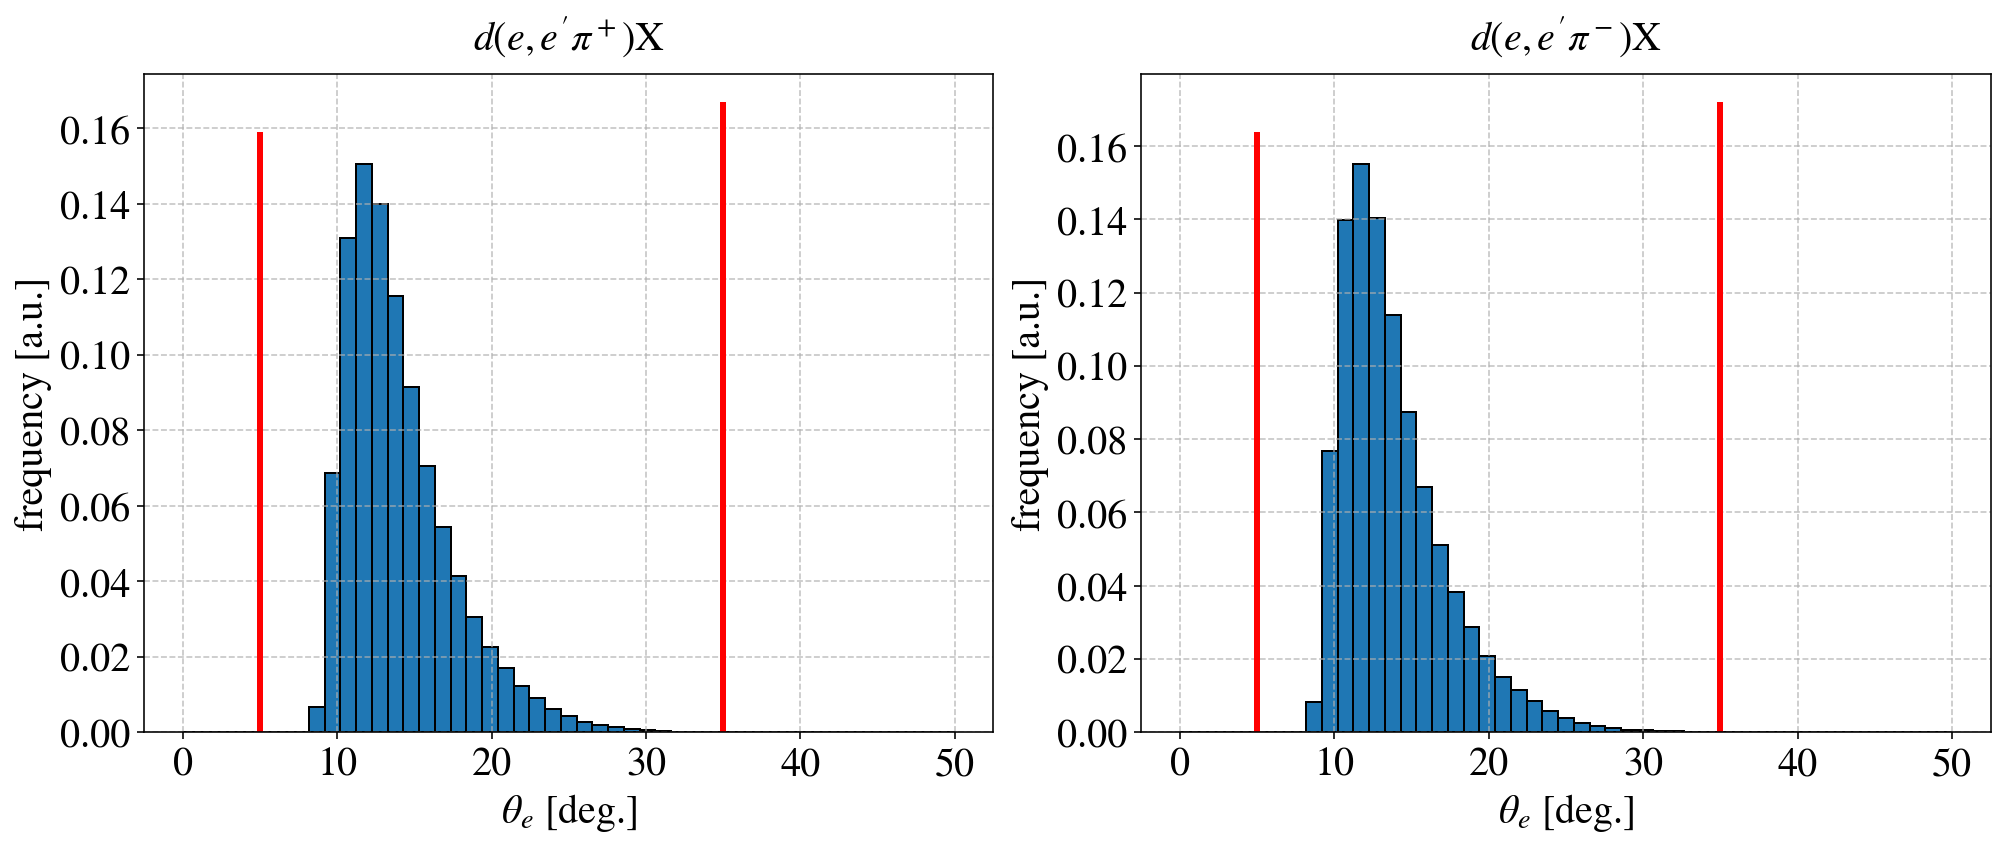

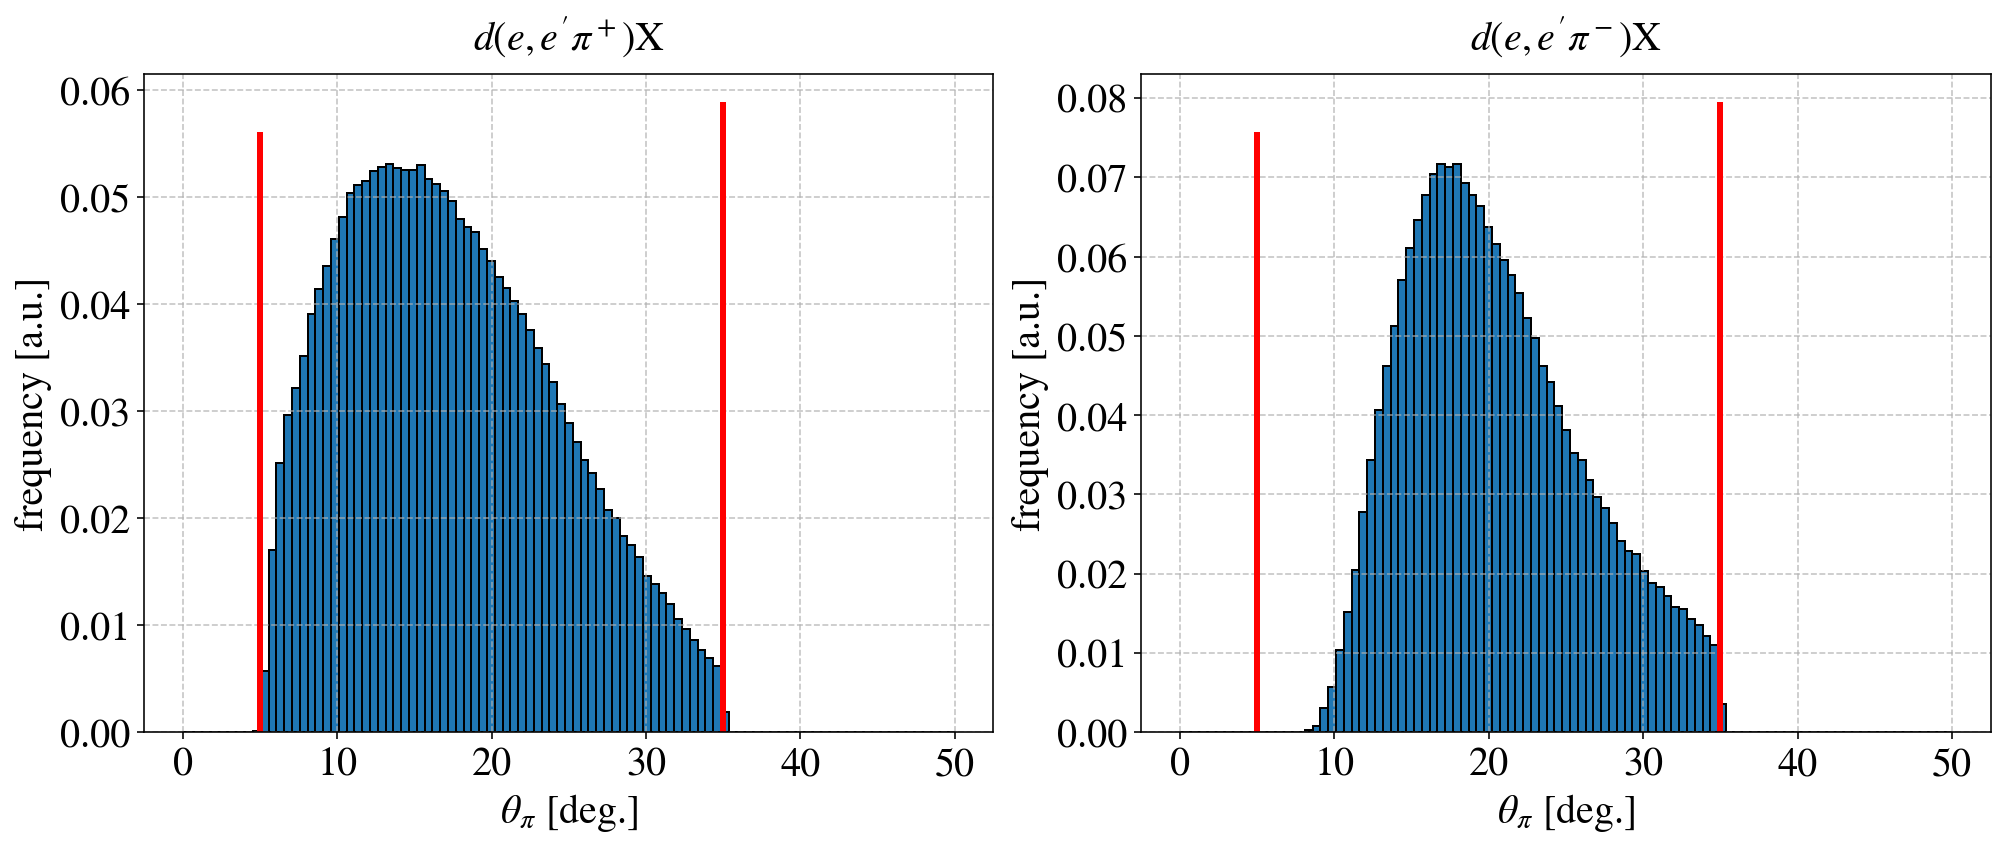

In [13]:
bins = np.linspace(0,50,50)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],[1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['e_Theta']*180./3.14 , bins=bins, edgecolor='k', density=True)
    set_axes(ax,'$\\theta_e$ [deg.]','frequency [a.u.]',
             title = df_label,fontsize=20,do_add_grid=True);
    plt.plot( [e_theta_min,e_theta_min],ax.get_ylim(), '-r', linewidth=3)    
    plt.plot( [e_theta_max,e_theta_max],ax.get_ylim(), '-r', linewidth=3)    
    
plt.tight_layout()

bins = np.linspace(0,50,100)
fig = plt.figure(figsize=(14,6))
for df,df_label,subplotIdx in zip([e_pips,e_pims],["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],[1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist( df['pi_Theta']*180./3.14 , bins=bins, edgecolor='k', density=True)
    set_axes(ax,'$\\theta_\\pi$ [deg.]','frequency [a.u.]',
             title = df_label,fontsize=20,do_add_grid=True);
    plt.plot( [pi_theta_min,pi_theta_min],ax.get_ylim(), '-r', linewidth=3)    
    plt.plot( [pi_theta_max,pi_theta_max],ax.get_ylim(), '-r', linewidth=3)    
    
plt.tight_layout()

# arxiv

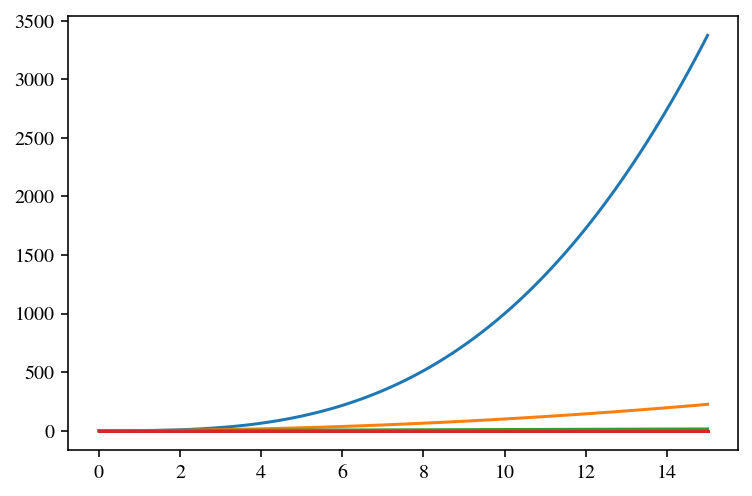

In [148]:
x_fit = np.linspace(0,15,100)
deg = 3
TT = np.vstack([x_fit**(deg-i) for i in range(deg+1)]).T
plt.plot(x_fit,TT);